In [1]:
import os, warnings, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
dataset =pd.read_csv('/content/drive/MyDrive/master-iot-data/dataset/merged_data.csv')
data = dataset.copy()
data

<ipython-input-3-5f5af92206f1>:1: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset =pd.read_csv('/content/drive/MyDrive/master-iot-data/dataset/merged_data.csv')


,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Attack Type
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,IMAPS,Email,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,NetBIOS,System,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,IMAP,Email,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,RPC,RPC,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547835,3461,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,58124,192.168.137.15,0c:8b:95:09:c6:08,0c:8b:95,80,...,HTTP.Microsoft,Cloud,0,6,espressif.mshome.net,NaN,NaN,Mozilla/5.0 (compatible; Nmap Scripting Engine...,NaN,Vulnerability Scan
547836,3462,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,58134,192.168.137.15,0c:8b:95:09:c6:08,0c:8b:95,80,...,HTTP.Microsoft,Cloud,0,6,espressif.mshome.net,NaN,NaN,Mozilla/5.0 (compatible; Nmap Scripting Engine...,NaN,Vulnerability Scan
547837,3463,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,58142,192.168.137.15,0c:8b:95:09:c6:08,0c:8b:95,80,...,HTTP.Microsoft,Cloud,0,6,espressif.mshome.net,NaN,NaN,Mozilla/5.0 (compatible; Nmap Scripting Engine...,NaN,Vulnerability Scan
547838,3464,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,58158,192.168.137.15,0c:8b:95:09:c6:08,0c:8b:95,80,...,HTTP,Web,0,6,NaN,NaN,NaN,NaN,NaN,Vulnerability Scan


In [4]:
data.columns

Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst

In [5]:
data.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Attack Type
0,0,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,256,...,Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
1,1,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,993,...,IMAPS,Email,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
2,2,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,139,...,NetBIOS,System,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
3,3,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,143,...,IMAP,Email,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan
4,4,0,192.168.137.85,a8:6b:ad:1f:9b:e5,a8:6b:ad,42750,192.168.137.226,0c:8b:95:09:c6:08,0c:8b:95,135,...,RPC,RPC,1,1,NaN,NaN,NaN,NaN,NaN,Aggressive Scan


In [6]:
print("Gözlem sayısı : " ,len(data))
print("Değişken sayısı : ", len(data.columns))

Gözlem sayısı :  547840
Değişken sayısı :  87


In [7]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,547840.0,27999.705009,20450.338072,0.0,7627.0,26414.0,45980.0,65557.0
expiration_id,547840.0,0.000111,0.010552,0.0,0.0,0.0,0.0,1.0
src_port,547840.0,34988.529675,18392.089299,0.0,19551.0,36634.0,50496.0,65535.0
dst_port,547840.0,2136.185890,8376.547208,0.0,80.0,80.0,80.0,65535.0
protocol,547840.0,6.321377,1.854013,1.0,6.0,6.0,6.0,58.0
...,...,...,...,...,...,...,...,...
dst2src_psh_packets,547840.0,0.034917,2.942004,0.0,0.0,0.0,0.0,300.0
dst2src_rst_packets,547840.0,0.131166,0.378558,0.0,0.0,0.0,0.0,5.0
dst2src_fin_packets,547840.0,0.000590,0.025449,0.0,0.0,0.0,0.0,3.0
application_is_guessed,547840.0,0.848563,0.358474,0.0,1.0,1.0,1.0,1.0


In [8]:
data['Attack Type'].value_counts()

,count
Attack Type,
SYN Flood,131107
Synonymous IP,131093
TCP Flood,131087
Push ACK Flood,65536
UDP Flood,15956
SYN Stealth,15247
Port Scan,13092
Vulnerability Scan,12581
Aggressive Scan,12332


In [9]:
attack_types = data['Attack Type'].unique()
print(attack_types)

['Aggressive Scan' 'ICMP Flood' 'ICMP Fragmentation' 'OS Fingerprinting'
 'Port Scan' 'Push ACK Flood' 'Service Detection' 'SlowLoris Scan'
 'SYN Flood' 'SYN Stealth' 'Synonymous IP' 'TCP Flood' 'UDP Flood'
 'Vulnerability Scan' 'Benign']


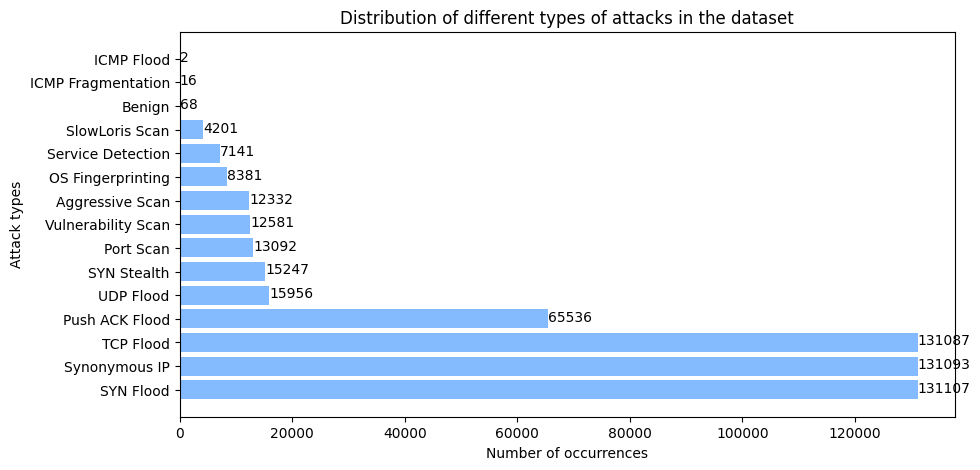

In [10]:
plt.figure(figsize=(10, 5))

attack = ('SYN Flood', 'Synonymous IP', 'TCP Flood', 'Push ACK Flood', 'UDP Flood', 'SYN Stealth',
          'Port Scan', 'Vulnerability Scan', 'Aggressive Scan', 'OS Fingerprinting',
          'Service Detection', 'SlowLoris Scan', 'Benign', 'ICMP Fragmentation', 'ICMP Flood')
y_pos = np.arange(len(attack))

amount = data['Attack Type'].value_counts().reindex(attack)[0:].values  # Seriyi diziye dönüştürme ve indeksleri yeniden düzenleme

plt.barh(y_pos, amount, align='center', color='#84bbff')
plt.yticks(y_pos, attack)
plt.title('Distribution of different types of attacks in the dataset')
plt.xlabel('Number of occurrences')
plt.ylabel('Attack types')

for i, v in enumerate(amount):
    plt.text(v + 3, i - 0.1, str(v))

plt.show()